In [308]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City Data
city_data = pd.read_csv(city_data_to_load)
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [309]:
# Read the Ride Data
ride_data = pd.read_csv(ride_data_to_load)
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [310]:
# Merge data into a single dataset
total_data = pd.merge(ride_data, city_data, on = 'city', how = 'left')
# Read the Data
total_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [311]:
# Checked data for duplicates of ride_id—took max value count to see if any above 1
total_data['ride_id'].value_counts().max()

1

## Bubble Plot of Ride Sharing Data

In [312]:
# Obtain the x and y coordinates for each of the three city types
# Group by City
city_grouped_df = total_data.groupby(['city'])
# Calculate Average Fare per City
city_grouped_mean = city_grouped_df['fare'].mean()
city_grouped_mean.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [313]:
# Calculate Total Number of Rides per City
city_grouped_rides = city_grouped_df['ride_id'].nunique()
city_grouped_rides.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [314]:
#Calculate Driver Counts per City (Take mean, since driver count is repeated per user_id)
driver_count = city_grouped_df['driver_count'].mean()
driver_count.head()

city
Amandaburgh      12
Barajasview      26
Barronchester    11
Bethanyland      22
Bradshawfurt      7
Name: driver_count, dtype: int64

In [315]:
#Create Dataframe with only City and Type
city_type_df = city_data.set_index('city')['type']
city_type_df.head()

city
Richardfort     Urban
Williamsstad    Urban
Port Angela     Urban
Rodneyfort      Urban
West Robert     Urban
Name: type, dtype: object

In [316]:
#Create a Dataframe from collected stats
ride_stats = pd.DataFrame({"Average Fare":city_grouped_mean, "Total Rides" : city_grouped_rides, "Total Drivers": driver_count, "City Type": city_type_df})
ride_stats.head()

,Average Fare,Total Rides,Total Drivers,City Type
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


In [317]:
#Create a Dataframe for Each City Types 
urban = ride_stats.loc[ride_stats['City Type'] =='Urban']
suburban = ride_stats.loc[ride_stats['City Type']=='Suburban']
rural = ride_stats.loc[ride_stats['City Type'] == 'Rural']

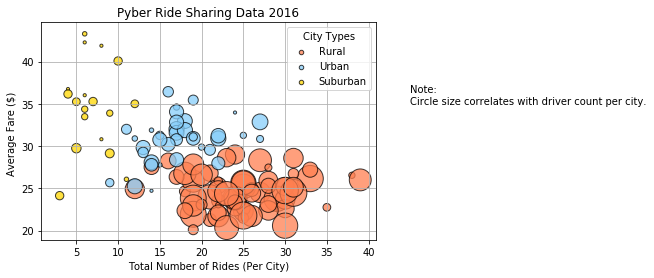

In [318]:
# Build Scatter Plot for Urban
plt.scatter(urban["Total Rides"],
            urban["Average Fare"],
            color = "coral",
            edgecolors = "black",
            s = urban["Total Drivers"]*10,
            alpha = 0.75)

# Build Scatter Plot for Suburban
plt.scatter(suburban["Total Rides"],
            suburban["Average Fare"],
            color = "lightskyblue",
            edgecolors = "black",
            s = suburban["Total Drivers"]*10,
            alpha = 0.75)

# Build Scatter Plot for Rural
plt.scatter(rural["Total Rides"], 
            rural["Average Fare"],
            color = "gold",
            edgecolors = "black",
            s = rural["Total Drivers"]*10,
            alpha = 0.75)

# Add Title and x and y Labels and Legend and Grid
plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($) ")
labels = ["Rural","Urban","Suburban"]
lgnd = plt.legend(labels,title = "City Types",loc="upper right")
lgnd.legendHandles[0]._sizes = [20]
lgnd.legendHandles[1]._sizes = [20]
lgnd.legendHandles[2]._sizes = [20]
plt.grid()

# Incorporate a text label regarding circle size
plt.text(45,35,"Note: \nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("Pyber Ride Sharing Data 2016.png")

## Total Fares by City Type

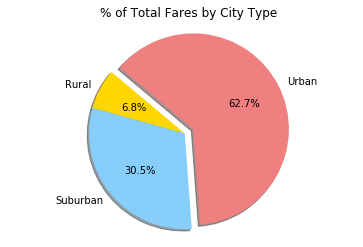

In [319]:
# Calculate Type Percents
grouped_type= total_data.groupby(['type'])
total_fare = grouped_type ['fare'].sum()
fare_df = pd.DataFrame({'Total Fare': total_fare})

# Build Pie Chart
colors = ["gold", "lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
total_fare.plot(kind = "pie",
                y=fare_df.keys(),
                explode=explode,
                colors=colors,
                autopct="%1.1f%%",
                startangle=140,
                title ="% of Total Fares by City Type",
                legend= False,
                shadow=True)
plt.axis('off')
plt.axis('equal')

#Save Figure
plt.savefig('Total Fares by City Type.png')

## Total Rides by City Type

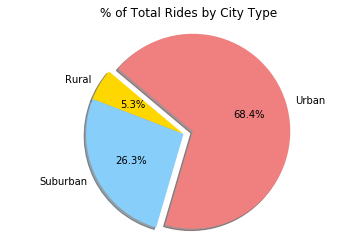

In [320]:
# Calculate Type Percents
total_rides = grouped_type["ride_id"].count()
rides_df = pd.DataFrame({'Total Rides': total_rides})

# Build Pie Chart
colors = ["Gold", "lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
rides_df.plot(kind = "pie",
              y=rides_df.keys(), 
              explode=explode,
              colors=colors,
              autopct="%1.1f%%",
              startangle=140,
              title ="% of Total Rides by City Type",
              legend= False,
              shadow=True)
plt.axis('off')
plt.axis('equal')

#Save Figure
plt.savefig('Total Rides by City Type.png')

## Total Drivers by City Type

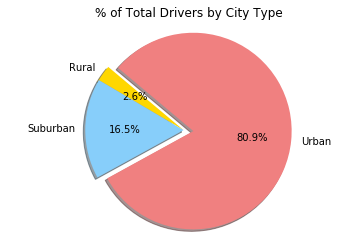

In [321]:
# Calculate Driver Percents
grouped_city = city_data.groupby(['type'])
total_drivers = grouped_city["driver_count"].sum()
drivers_df = pd.DataFrame({'Total Drivers': total_drivers})

# Build Pie Chart
colors = ["Gold", "lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
drivers_df.plot(kind = "pie",
                y=drivers_df.keys(),
                explode=explode,
                colors=colors,
                autopct="%1.1f%%",
                startangle=140,
                title ="% of Total Drivers by City Type",
                legend= False,
                shadow=True)
plt.axis('off')
plt.axis('equal')

#Save Figure
plt.savefig('Total Drivers by City Type.png')